In [39]:
%pip install matplotlib pysimilar --quiet

In [3]:
import os
import json
from matplotlib import pyplot as plt
from pysimilar import compare

In [4]:
extraction_benchmark_path = "../extract_questions/results/benchmark_results.json"
if not os.path.exists(extraction_benchmark_path):
    raise FileNotFoundError("Please run the extraction benchmark first")

# Extractions

In [21]:
with open(extraction_benchmark_path, "r") as file:
    data_extraction = json.load(file)

## Number of originals vs number of extractions

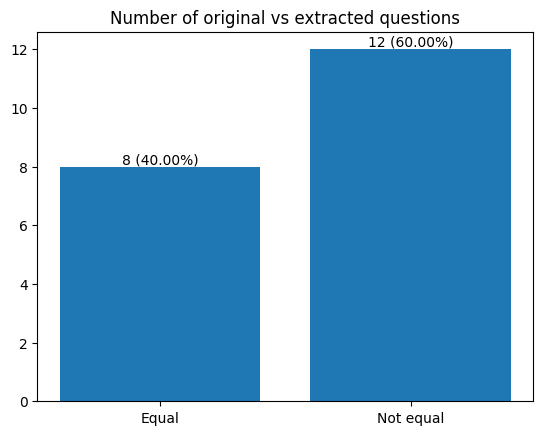

In [34]:
numbers_extracted = {}

for email in data_extraction["results"]:
    num_original =  len(data_extraction["results"][email]["original_questions"])
    num_extracted = len(data_extraction["results"][email]["extracted_questions"])
    numbers_extracted[email] = {
          "num_original": num_original,
          "num_extracted": num_extracted,
          "ratio": num_extracted / num_original,
          "equal": num_original == num_extracted
    }
    
# Plot equal and not equal
equal = [numbers_extracted[email]["equal"] for email in numbers_extracted]
not_equal = len(equal) - sum(equal)
plt.bar(["Equal", "Not equal"], [sum(equal), not_equal])
plt.title("Number of original vs extracted questions")

for i, v in enumerate([sum(equal), not_equal]):
    plt.text(i, v + 0.1, f"{v} ({v/len(equal)*100:.2f}%)", ha='center')
plt.show()

## Similarity scores

When the value is close to 0, the two texts are very different. When the value is close to 1, the two texts are very similar.

### All together

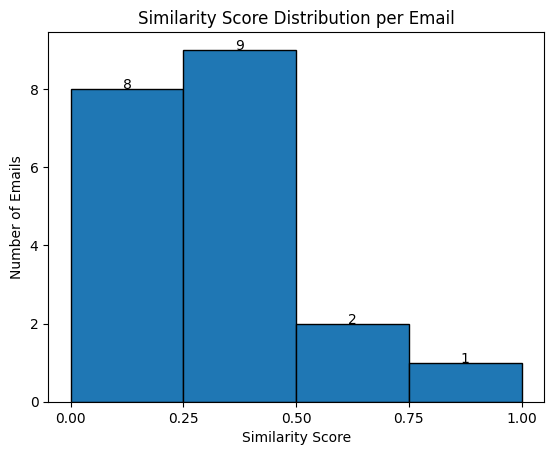

In [71]:
together_similarity_score = {}

for email in data_extraction["results"]:
    all_originals =  "\n ".join([question['question'] for question in data_extraction["results"][email]["original_questions"]])
    all_extracted = "\n ".join([question['question'] for question in data_extraction["results"][email]["extracted_questions"]])
    
    similarity_score = compare(all_originals, all_extracted)
    together_similarity_score[email] = similarity_score    

together_similarity_score
avg_similarity = sum(together_similarity_score.values()) / len(together_similarity_score)

bins = [0, 0.25, 0.5, 0.75, 1]
counts, _, _ = plt.hist(
    together_similarity_score.values(),
    bins=bins,
    edgecolor='black',
)
plt.title("Similarity Score Distribution per Email")
plt.xlabel("Similarity Score")
plt.ylabel("Number of Emails")
plt.xticks(bins)

# Add number on top of each bar
for i, v in enumerate(counts):
    plt.text(bins[i] + 0.125, v, f"{int(v)}", ha='center')

plt.show()
    

### Per question 
*Taking the highest similarity score for each question*

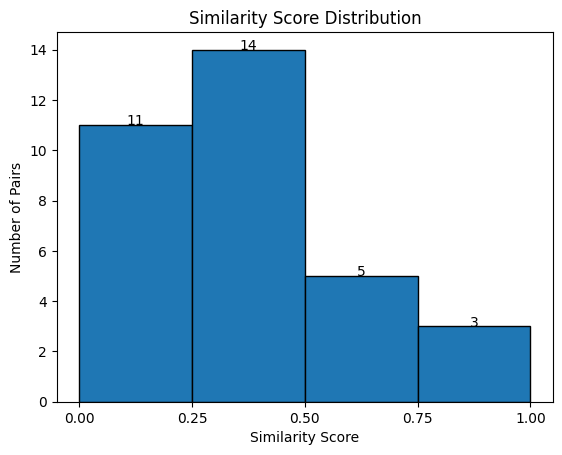

In [69]:
all_pairs = {}
for email in data_extraction["results"]:
    original_questions = [question['question'] for question in data_extraction["results"][email]["original_questions"]]
    extracted_questions = [question['question'] for question in data_extraction["results"][email]["extracted_questions"]]
    best_score = 0
    pairs = []
    for original_question in original_questions:
        for extracted_question in extracted_questions:
            score = compare(original_question, extracted_question)
            if score > best_score:
                best_score = score
                pairs.append({
                    "original": original_question,
                    "extracted": extracted_question,
                    "score": score
                })
                
    all_pairs[email] = pairs
    

bins = [0, 0.25, 0.5, 0.75, 1]

counts, _, _ = plt.hist(
    [pair["score"] for pairs in all_pairs.values() for pair in pairs],
    bins=bins,
    edgecolor='black',
)

plt.title("Similarity Score Distribution per question pair")
plt.xlabel("Similarity Score")
plt.ylabel("Number of Pairs")
plt.xticks(bins)

for i, v in enumerate(counts):
    plt.text(bins[i] + 0.125, v, f"{int(v)}", ha='center')
    
plt.show()
  

# Time

Average time per question: 10.67 seconds
Average time per email: 15.66 seconds


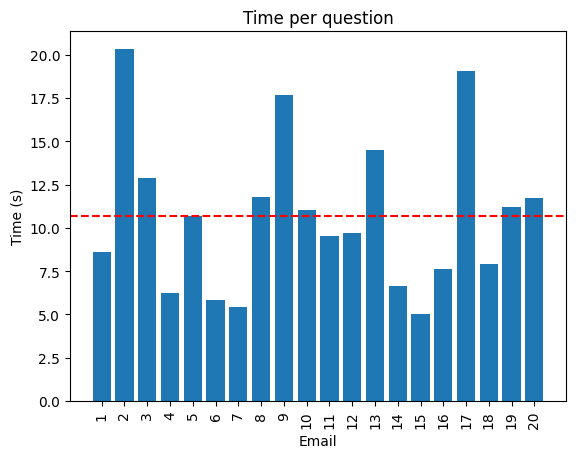

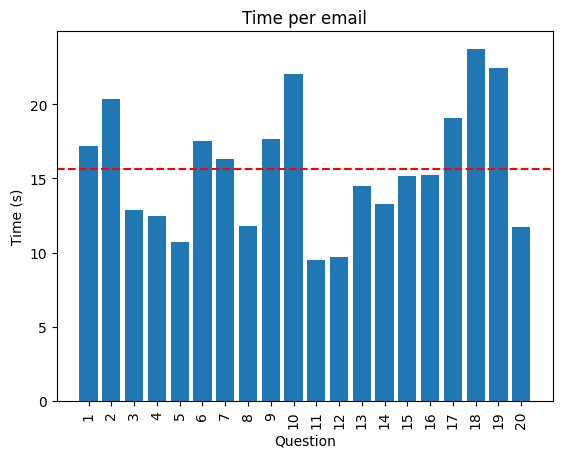

In [81]:
time_per_question = {}
time_per_email = {}

for i, email in enumerate(data_extraction["results"]):
    time = data_extraction["results"][email]["extraction_time"]
    num_questions = len(data_extraction["results"][email]["original_questions"])
    time_per_question[i+1] = time / num_questions
    time_per_email[i+1] = time
        
avg_time_per_question = sum(time_per_question.values()) / len(time_per_question)
avg_time_per_email = sum(time_per_email.values()) / len(time_per_email)

print(f"Average time per question: {avg_time_per_question:.2f} seconds")
print(f"Average time per email: {avg_time_per_email:.2f} seconds")

plt.bar(time_per_question.keys(), time_per_question.values())
plt.axhline(y=avg_time_per_question, color='r', linestyle='--')
plt.title("Time per question")
plt.ylabel("Time (s)")
plt.xlabel("Email")
plt.xticks(list(time_per_question.keys()), list(time_per_question.keys()), rotation=90)
plt.show()

plt.bar(time_per_email.keys(), time_per_email.values())
plt.axhline(y=avg_time_per_email, color='r', linestyle='--')
plt.title("Time per email")
plt.ylabel("Time (s)")
plt.xlabel("Question")
plt.xticks(list(time_per_email.keys()), list(time_per_question.keys()), rotation=90)
plt.show()


